In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("gen_dataset2.csv")

In [ ]:
print(data["Crop"].unique())

['Rice' 'Maize' 'Jowar' 'Ragi' 'Groundnut' 'Soyabean' 'Sugarcane' 'Cotton'
 'Wheat' 'Gram' 'Bajra']


In [ ]:
data.head(10)

,Temp,Hum,pH,Rain,Crop
0,26.404735,77.059145,6.856018,1749.709220,Rice
1,25.298306,78.539779,7.498999,1614.126414,Rice
2,21.057242,74.896576,6.038525,1692.778372,Rice
3,25.105815,74.261481,5.534759,1522.385447,Rice
4,24.538695,72.797708,6.415953,1526.678906,Rice
5,25.484802,76.656800,7.524470,1865.081427,Rice
6,27.330296,75.228266,5.962829,1517.425457,Rice
7,21.052827,72.310062,6.965932,1779.771990,Rice
8,22.860707,70.830043,7.517103,1775.206019,Rice
9,23.034263,73.425507,6.545397,1595.777969,Rice


In [ ]:
data.describe()

,Temp,Hum,pH,Rain
count,1650.000000,1650.000000,1650.000000,1650.000000
mean,26.122058,70.570816,6.741405,904.463941
std,3.081796,9.676828,0.723071,660.429041
min,20.015610,50.036761,4.521592,250.369441
25%,23.595507,62.831698,6.323648,436.110722
50%,26.389249,69.540249,6.761313,638.182904
75%,28.406001,79.294586,7.199441,1053.146391
max,32.995929,89.761005,8.596548,2998.049918


In [ ]:
data.isnull().any()

Temp    False
Hum     False
pH      False
Rain    False
Crop    False
dtype: bool

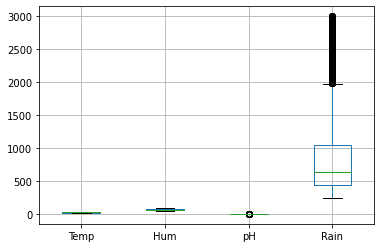

In [ ]:
data.boxplot()

In [ ]:
data["Crop"]

0        Rice
1        Rice
2        Rice
3        Rice
4        Rice
        ...  
1645    Bajra
1646    Bajra
1647    Bajra
1648    Bajra
1649    Bajra
Name: Crop, Length: 1650, dtype: object

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [ ]:
X

array([[  26.40473492,   77.05914467,    6.8560182 , 1749.70922043],
       [  25.2983057 ,   78.53977904,    7.49899881, 1614.12641372],
       [  21.05724166,   74.89657599,    6.03852506, 1692.77837215],
       ...,
       [  24.84518917,   63.02719925,    6.98082123,  494.81838037],
       [  28.93973219,   64.37845045,    6.83765433,  572.15261596],
       [  28.84679535,   61.47061134,    7.47425704,  472.23918735]])

In [ ]:
Y

array(['Rice', 'Rice', 'Rice', ..., 'Bajra', 'Bajra', 'Bajra'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = None)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test)

model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train,Y_train)

y_predict = model.predict(X_test)
 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, y_predict)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_predict)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_predict)
print("Accuracy:",result2)

Confusion Matrix:
[[29  0  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  1  0  0  0  0]
 [ 0  0  0  0  0 27  2  0 11  0  0]
 [ 2  0  0  0  3  3 35  0  2  0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0]
 [ 3  0  0  0  0  7  3  0 26  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0  0 37]]
Classification Report:
              precision    recall  f1-score   support

       Bajra       0.85      1.00      0.92        29
      Cotton       1.00      1.00      1.00        45
        Gram       1.00      1.00      1.00        30
   Groundnut       1.00      1.00      1.00        33
       Jowar       0.92      0.97      0.94        35
       Maize       0.73      0.68      0.70        40
        Ragi       0.85      0.78      0.81        45
        Rice       1.00      1.00      1.00        40
    Soyabean       0.67      0.67      0.67        39
   Sugarcane       1.

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))